In [5]:
#optional - plotting indexes, saving them

from ipywidgets import FloatProgress, Layout
import ipywidgets as widgets
from ipywidgets import Layout, Button, Box
from IPython.display import display
from ipyfilechooser import FileChooser
import micasense.imageset as imageset
import micasense.capture as capture
import os, glob
import multiprocessing
from pathlib import Path
import math
import numpy as np
from mapboxgl.viz import *
from mapboxgl.utils import df_to_geojson, create_radius_stops, scale_between
from mapboxgl.utils import create_color_stops
import pandas as pd
import numpy as np
import exiftool
import datetime
import subprocess
from micasense import plotutils
import micasense.imageutils as imageutils
import matplotlib.pyplot as plt
import matplotlib.image as img
%run ./functionland.ipynb

#assign an image path incase you forget to choose one
#


box_layout = Layout(display='flex',
                    flex_flow='column', 
                    align_items='stretch', 
             
                    width='60%')



v_min_ndvi=widgets.FloatText(
    value=-1,
    description='Min NDVI Display',
    step=0.1,
    disabled=False
)

v_max_ndvi=widgets.FloatText(
    value=1,
    description='Max NDVI Display',
    step=0.1,
    disabled=False
)

ndvi_use_percentiles=widgets.Dropdown(
    options=[('Use Raw Value', 0), ('Use Percentiles', 1)],
    value=0,
    description='NDVI Range Type:',
)

calculate_ndwi=widgets.Checkbox(
    value=False,
    description='Calculate NDWI',
)

v_min_ndwi=widgets.FloatText(
    value=-1,
    description='Min NDWI Display',
    step=0.1,
    disabled=False
)

v_max_ndwi=widgets.FloatText(
    value=1,
    description='Max NDWI Display',
    step=0.1,
    disabled=False
)

ndwi_use_percentiles=widgets.Dropdown(
    options=[('Use Raw Value', 0), ('Use Percentiles', 1)],
    value=0,
    description='NDWI Range Type:',
)


v_min_custom=widgets.FloatText(
    value=-1,
    description='Min custom Display',
    step=0.1,
    disabled=False
)

v_max_custom=widgets.FloatText(
    value=1,
    description='Max custom Display',
    step=0.1,
    disabled=False
)


calculate_custom=widgets.Dropdown(
    options=[('No', 0), ('Yes', 1)],
    value=0,
    description='Calculate Custom:',
)

perform_deresolution=widgets.Dropdown(
    options=[('No', 0), ('Yes', 1)],
    value=0,
    description='Perform Deresolution:',
)


x_deres=widgets.BoundedIntText(
    value=1,
    min=1,
    max=1280,
    step=1,
    description=':',
    disabled=False
)



y_deres=widgets.BoundedIntText(
    value=1,
    min=1,
    max=960,
    step=1,
    description=':',
    disabled=False
)


#display(calculate_custom)

plot_band_outputs=widgets.Dropdown(
    options=[('No', 0), ('Yes', 1)],
    value=0,
    description='Plot Bands Output:',
)

save_band_outputs=widgets.Dropdown(
    options=[('No', 0), ('Yes', 1)],
    value=0,
    description='Save Bands Output:',
)

Band1=widgets.Dropdown(
    options=[('blue'), ('green'),('red'),('red edge'),('nir')],
    value='blue',
    description='band 1:',
)

b1=widgets.FloatText(
    value=1,
    description='band 1 gain',
    step=0.1,
    disabled=False
)

Band2=widgets.Dropdown(
    options=[('blue'), ('green'),('red'),('red edge'),('nir')],
    value='green',
    description='band 2',
)

b2=widgets.FloatText(
    value=1,
    description='band 2 gain',
    step=0.1,
    disabled=False
)

Band3=widgets.Dropdown(
    options=[('blue'), ('green'),('red'),('red edge'),('nir')],
    value='red',
    description='band 3',
)

b3=widgets.FloatText(
    value=1,
    description='band 3 gain',
    step=0.1,
    disabled=False
)


Band4=widgets.Dropdown(
    options=[('blue'), ('green'),('red'),('red edge'),('nir')],
    value='nir',
    description='band 4',
)


b4=widgets.FloatText(
    value=1,
    description='band 4 gain',
    step=0.1,
    disabled=False
)

PSA=widgets.Textarea(
    value='Formula for Custom Band is (Band1*b1 + band2*b2)/(Band3*b3 + band3*b3)',
    placeholder='',
    width='100%',
    description='WARNING',
    disabled=False
)

custom_use_percentiles=widgets.Dropdown(
    options=[('Use Raw Value', 0), ('Use Percentiles', 1)],
    value=0,
    description='Custom Range Type:',
)

box11=widgets.HBox([Band1, b1])
box21=widgets.HBox([Band2, b2])
box31=widgets.HBox([Band3, b3])
box41=widgets.HBox([Band4, b4])

box5 = widgets.VBox([plot_band_outputs, save_band_outputs])
left_box = widgets.VBox([v_min_ndvi, v_max_ndvi])
right_box = widgets.VBox([v_min_ndwi, v_max_ndwi])
box1=widgets.HBox([left_box, right_box])
box2=widgets.HBox([ndvi_use_percentiles, ndwi_use_percentiles])



#box
ndvi_plot=widgets.Dropdown(
    options=[('No', 0), ('Yes', 1)],
    value=0,
    description='Plot NDVI:',
)
ndwi_plot=widgets.Dropdown(
    options=[('No', 0), ('Yes', 1)],
    value=0,
    description='Plot NDWI:',
)
ndvi_save=widgets.Dropdown(
    options=[('No', 0), ('Yes', 1)],
    value=0,
    description='Save NDVI:',
)
ndwi_save=widgets.Dropdown(
    options=[('No', 0), ('Yes', 1)],
    value=0,
    description='Save NDWI:',
)
custom_plot=widgets.Dropdown(
    options=[('No', 0), ('Yes', 1)],
    value=0,
    description='Plot Custom:',
)
custom_save=widgets.Dropdown(
    options=[('No', 0), ('Yes', 1)],
    value=0,
    description='Save Custom:',
)
box100=widgets.VBox([ndvi_plot,ndwi_plot])
box200=widgets.VBox([ndvi_save, ndwi_save])
box300=widgets.HBox([box100, box200])

box400=widgets.HBox([custom_plot, custom_save])

boxist=widgets.HBox([v_min_custom, v_max_custom])

fc = FileChooser('./')
display(fc)

overwrite_existing=widgets.ToggleButton(
    value=False,
    description='Overwrite Existing',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Overwrites existing outputs, allowing processing to continue',
    icon=''
)

display(overwrite_existing)


accordion = widgets.Accordion(children=[box1, box2,box300])
accordion.set_title(0, 'Display Range')
accordion.set_title(1, 'Range Type')
accordion.set_title(2, 'Plot&Save')
accordion

accordion1 = widgets.Accordion(children=[box5])
accordion1.set_title(0, 'Plot & Save Options')
accordion1

accordion2 = widgets.Accordion(children=[perform_deresolution,x_deres,y_deres])
accordion2.set_title(0, 'On/Off')
accordion2.set_title(1, 'X Deres.')
accordion2.set_title(2, 'Y Deres.')
accordion2


accordion4 = widgets.Accordion(children=[calculate_custom,PSA,box11, box21,box31,box41,boxist,custom_use_percentiles,box400])
accordion4.set_title(0, 'On/Off')
accordion4.set_title(1, 'PLEASE READ')
accordion4.set_title(2, 'Band 1')
accordion4.set_title(3, 'Band 2')
accordion4.set_title(4, 'Band 3')
accordion4.set_title(5, 'Band 4')
accordion4.set_title(6, 'Display Range')
accordion4.set_title(7, 'Range Type')
accordion4.set_title(8, 'Plot&Save')
accordion4






tab_nest = widgets.Tab()
tab_nest.children = [accordion2, accordion, accordion1,accordion4]
tab_nest.set_title(0, 'Deresolution')
tab_nest.set_title(1, 'Main Indexes')
tab_nest.set_title(2, '5 Bands')
tab_nest.set_title(3, 'Custom Index')
tab_nest


FileChooser(path='/home/opeyemi/Documents/imageprocessing-master', filename='', title='', show_hidden=False, s…

ToggleButton(value=False, description='Overwrite Existing', tooltip='Overwrites existing outputs, allowing pro…

In [6]:
#START FROM HERE 
###################################################################################################################
try:
    imagePath = Path(fc.selected_path)
except:
    imagePath = Path("./OGOP_DATA/REDEDGE-MX")  #FALLBACK IMAGE PATH

panelNames = None
useDLS = True

panelNames = list(imagePath.glob('IMG_0001_*.tif'))
panelNames = [x.as_posix() for x in panelNames]
panelCap = capture.Capture.from_filelist(panelNames)


outputPath = imagePath / '..'/'stacks'
thumbnailPath = imagePath /'..'/ 'thumbnails'
fullCsvPath = os.path.join(outputPath,'pixels.csv')



overwrite = overwrite_existing.value 
generateThumbnails = True  


In [7]:


####################################################################################################################
if panelNames is not None:
    panelCap = capture.Capture.from_filelist(panelNames)
else:
    panelCap = None

if panelCap is not None:
    if panelCap.panel_albedo() is not None and not any(v is None for v in panelCap.panel_albedo()):
        panel_reflectance_by_band = panelCap.panel_albedo()
    else:
        panel_reflectance_by_band = [0.49, 0.49, 0.49, 0.49, 0.49] #RedEdge band_index order
    
    panel_irradiance = panelCap.panel_irradiance(panel_reflectance_by_band)    
    img_type = "reflectance"
else:
    if useDLS:
        img_type='reflectance'
    else:
        img_type = "radiance"
#Loading Progress bar and operations
f = FloatProgress(min=0, max=1, layout=Layout(width='100%'), description="Loading")
display(f)
def update_f(val):
    if (val - f.value) > 0.005 or val == 1: 
        f.value=val

%time imgset = imageset.ImageSet.from_directory(imagePath, progress_callback=update_f)
update_f(1.0)

data, columns = imgset.as_nested_lists()
df = pd.DataFrame.from_records(data, index='timestamp', columns=columns)


geojson_data = df_to_geojson(df,columns[3:],lat='latitude',lon='longitude')


warp_matrices= None

#saving progress
f2 = FloatProgress(min=0, max=1, layout=Layout(width='100%'), description="Saving")
display(f2)
def update_f2(val):
    f2.value=val

if not os.path.exists(outputPath):
    os.makedirs(outputPath)
if generateThumbnails and not os.path.exists(thumbnailPath):
    os.makedirs(thumbnailPath)

# Save out geojson data so we can open the image capture locations in our GIS
with open(os.path.join(outputPath,'imageSet.json'),'w') as f:
    f.write(str(geojson_data))
    
try:
    irradiance = panel_irradiance+[0]
except NameError:
    irradiance = None



FloatProgress(value=0.0, description='Loading', layout=Layout(width='100%'), max=1.0)

CPU times: user 541 ms, sys: 50.1 ms, total: 591 ms
Wall time: 3.17 s


FloatProgress(value=0.0, description='Saving', layout=Layout(width='100%'), max=1.0)

In [8]:
###################################  MAIN SECTION   ###########################################################

#for pixel capture analysis. library containing major range and minor range 



start = datetime.datetime.now()
for i,capture in enumerate(imgset.captures):
    outputFilename = capture.uuid+'.tif'
    thumbnailFilename = capture.uuid+'.jpg'
    fullOutputPath = os.path.join(outputPath, outputFilename)
    fullThumbnailPath= os.path.join(thumbnailPath, thumbnailFilename)
    if (not os.path.exists(fullOutputPath)) or overwrite:
        if(len(capture.images) == len(imgset.captures[0].images)):
            im_aligned=capture.create_aligned_capture(irradiance_list=irradiance, warp_matrices=warp_matrices, img_type='reflectance')
            
            if perform_deresolution.value: 
                im_aligned=im_reduction3d(im_aligned, y_div=y_deres.value, x_div=x_deres.value)
            
            capture.save_capture_as_stack(fullOutputPath)
            
            if generateThumbnails:
                #edited capture function in lib
                #capture.save_capture_as_rgb(fullThumbnailPath,y_deres=y_deres.value, x_deres=x_deres.value)
                capture.save_capture_as_rgb(fullThumbnailPath)
                

    
######get individual bands with option to save them too#########################################################################################
    
    nir,red,green,blue,rededge=acquire_bands(im_aligned,capture,imagePath,plot_outputs=0,save_plots=0)
    
    greyscale_acquire(im_aligned,capture,imagePath,plot_outputs=1,save_plots=1)
    
#########################indexes##############################################################################

        
    #cir_composite(im_aligned,capture,imagePath)
    
    #ndvi=NDVI_calculator(red,nir,capture,imagePath,v_min=v_min_ndvi.value,v_max=v_max_ndvi.value,use_percentiles=ndvi_use_percentiles.value,plot_outputs=ndvi_plot.value,save_plots=ndvi_save.value)   
    ndssi = NDSSI_calculator(blue,nir,capture,imagePath,v_min=15,v_max=85,use_percentiles=1,plot_outputs=1,save_plots=0)
    wen = wen_algo(red,green,capture,imagePath, v_min=15,v_max=85,use_percentiles=1,plot_outputs=1,save_plots=0)
    ndwi=NDWI_calculator(green,nir,capture,imagePath,v_min=v_min_ndwi.value,v_max=v_max_ndwi.value,use_percentiles=ndvi_use_percentiles.value,plot_outputs=ndwi_plot.value,save_plots=0)
    
########################EXTRA PROCESSES custom index, list pixels, Mask with Overlay Options################################################  
    write_labeled_pixels(
    capture,
    blue, green, red, rededge, nir,
    wen, ndssi, ndwi,
    json_data=label_json,
    y_deres=y_deres.value,
    x_deres=x_deres.value,
    output_csv_path=os.path.join(outputPath, "training_pixels.csv"),
    img_format=".png",
    label_res_y=4,
    label_res_x=4)
    
    capturepixellister(wen,ndssi,ndwi,blue,green,red,rededge,nir,capture,outputPath) 
    #these functions were destined for thresholding analysis 
    #capturepixellister(ndvi,ndwi,blue,green,red,rededge,nir,capture,outputPath) 
    #masker(imagePath,capture,fullThumbnailPath,ndvi,m_min=0.3,m_max=0.6,plot_outputs=1,save_plots=1,plot_overlay=1,save_overlay=1) #can be used multiple time as AND filter
    
#######################################################################################################################
    im_height=im_aligned.shape[0]
    im_width=im_aligned.shape[1]
   
          
    capture.clear_image_data()
    update_f2(float(i)/float(len(imgset.captures)))
update_f2(1.0)
end = datetime.datetime.now()
print("Saving time: {}".format(end-start))
print("Alignment+Saving rate: {:.2f} images per second".format(float(len(imgset.captures))/float((end-start).total_seconds())))



/home/opeyemi/Documents/imageprocessing-master/micasense/imageutils.py:121: RuntimeWarning: divide by zero encountered in divide
  norm = (im - local_min) / (local_max - local_min)
/home/opeyemi/Documents/imageprocessing-master/micasense/imageutils.py:121: RuntimeWarning: invalid value encountered in divide
  norm = (im - local_min) / (local_max - local_min)
/home/opeyemi/Documents/imageprocessing-master/micasense/capture.py:686: RuntimeWarning: invalid value encountered in cast
  imageio.imwrite(outfilename, (255 * gamma_corr_rgb).astype('uint8'))


ValueError: 'Grays' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

In [19]:
#Section 2######################################################################################################
##widgets 
perform_histogram=widgets.Dropdown(
    options=[('No', 0), ('Yes', 1)],
    value=0,
    description='Perform Pixel Analysis',
)

perform_mask=widgets.Dropdown(
    options=[('No', 0), ('Yes', 1)],
    value=0,
    description='Perform Mask',
)

mask_plot_outputs=widgets.Dropdown(
    options=[('No', 0), ('Yes', 1)],
    value=0,
    description='Plot Mask Output',
)
mask_save_outputs=widgets.Dropdown(
    options=[('No', 0), ('Yes', 1)],
    value=0,
    description='Save Mask Output',
)
mask_plot_overlay=widgets.Dropdown(
    options=[('No', 0), ('Yes', 1)],
    value=0,
    description='Plot Overlay',
)
mask_save_overlay=widgets.Dropdown(
    options=[('No', 0), ('Yes', 1)],
    value=0,
    description='Save Overlay',
)

perform_mapping=widgets.Dropdown(
    options=[('No', 0), ('Yes', 1)],
    value=0,
    description='Perform mapping',
)
save_mapping=widgets.Dropdown(
    options=[('No', 0), ('Yes', 1)],
    value=0,
    description='Save map as HTML',
)

mpp1=widgets.VBox([perform_mapping,save_mapping])

mm1=widgets.HBox([mask_plot_outputs, mask_save_outputs])
mm2=widgets.HBox([mask_plot_overlay, mask_save_overlay])

mm3=widgets.VBox([perform_mask,mm1,mm2])

number_sections=widgets.IntText(
    value=3,
    step=1,
    description='Number of sections',
    disabled=False
)
tt=widgets.HBox([perform_histogram, number_sections])


accordion_matt = widgets.Accordion(children=[tt, mm3,mpp1])
accordion_matt.set_title(0, 'Pixel Histogram Options')
accordion_matt.set_title(1, 'Masking Options')
accordion_matt.set_title(2, 'Map Options')
accordion_matt

Accordion(children=(HBox(children=(Dropdown(description='Perform Pixel Analysis', options=(('No', 0), ('Yes', …

In [ ]:
##add widget for v2
##function to extract pixels wit6hin polygons from json
jsonPath=os.path.join(outputPath,'ll11.json')   #cocoJSON FILE
outputFilter=os.path.join(outputPath,'labelled.csv')  #name of output CSV


extract_pixels_by_polygon_with_deresolution(
    csv_file_path=fullCsvPath,
    json_file_path=jsonPath,
    output_csv_path=outputFilter,
    downscale_factor=(y_deres.value, x_deres.value),# Factor by which the image was downsampled after labelling
    im_type='.png'  #TYPE OF IMAGE USED FOR THE LABELLING
)



In [ ]:
#PIXEL
#set band ranges yourself, as many as you want and can repeat
if perform_histogram.value:
    band_ranges = {
        'red': ((0.2, 1.0), (0.5, 0.7)), 
        'green': ((0.1, 0.9), (0.3, 0.6))}

    analyze_pixel_data_from_csv(fullCsvPath, band_ranges, number_sections.value)





Processing band 'nir' for capture 'xDWlzLou9sK0ZLf0l2Ty' with range [0, 0.152]


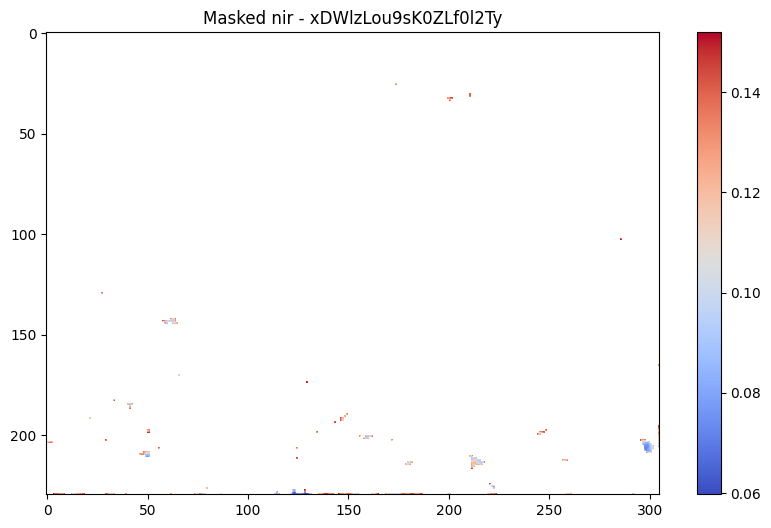

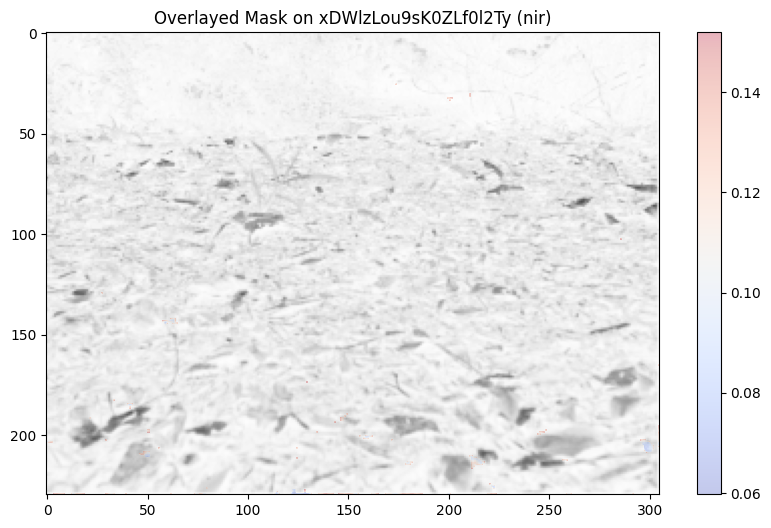

Processing band 'nir' for capture '7NWfVR7BoxjArvNG05dA' with range [0, 0.152]


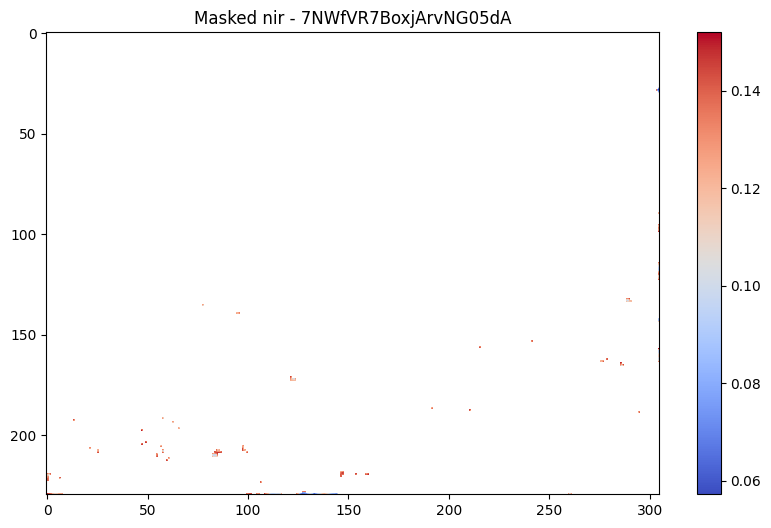

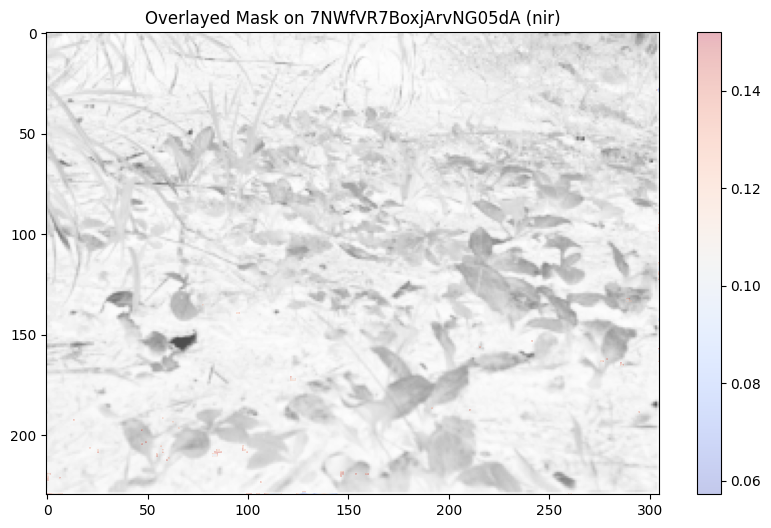

Processing band 'nir' for capture 'R1FfH4lpsodX2H8ZS41i' with range [0, 0.152]


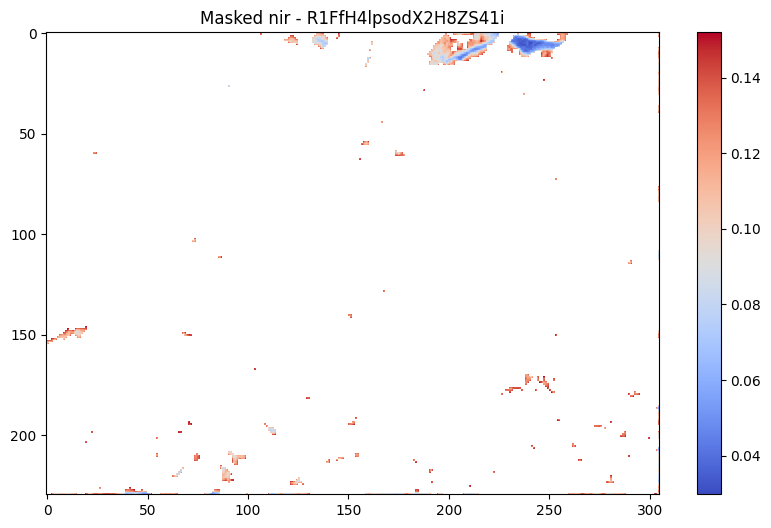

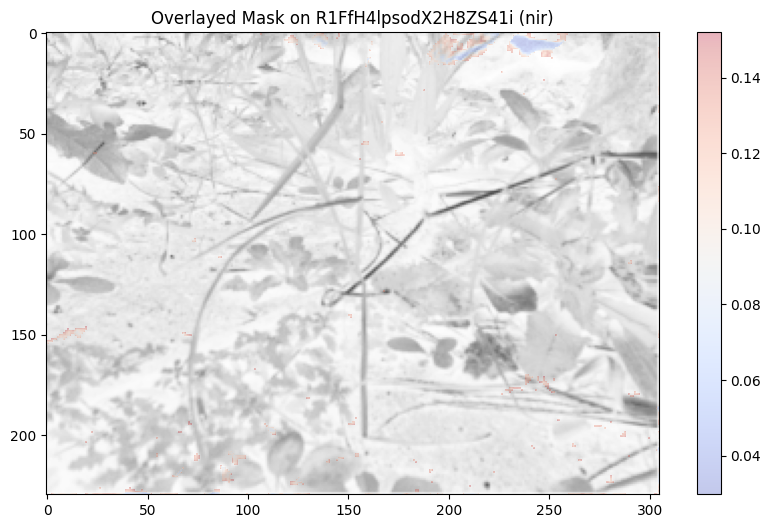

Processing band 'nir' for capture 'dlBCOrYZOCYIxmR2p5ZO' with range [0, 0.152]


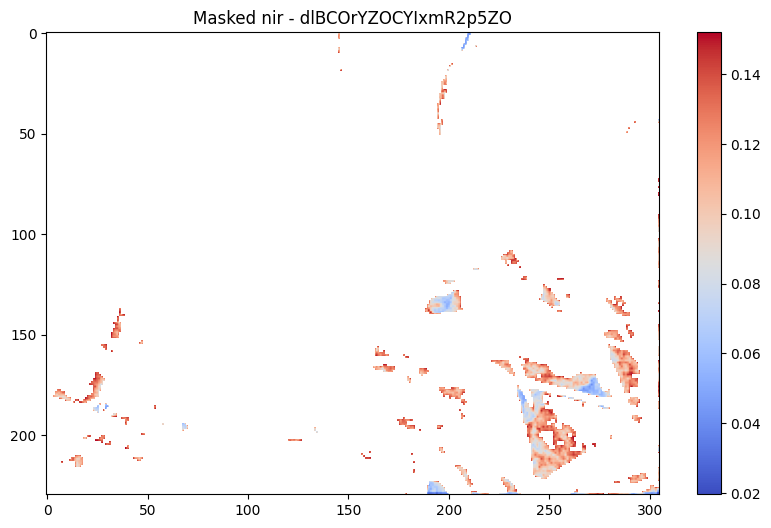

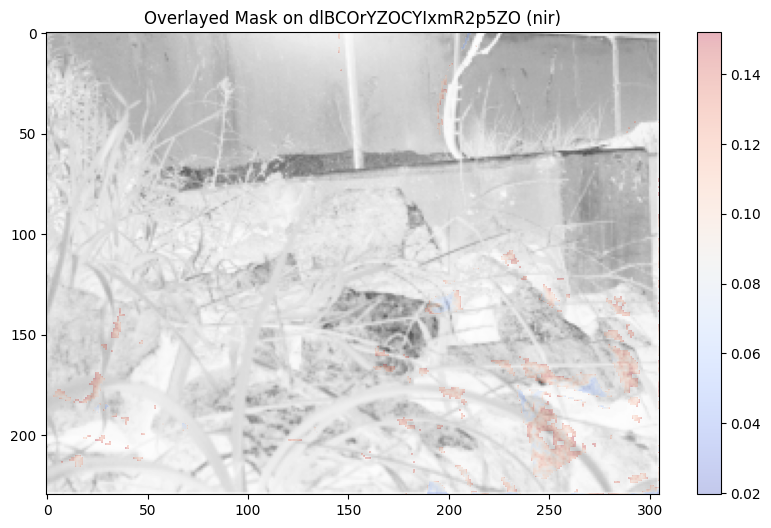

Processing band 'nir' for capture 'P669NUMkp7Hz1blG2YhR' with range [0, 0.152]


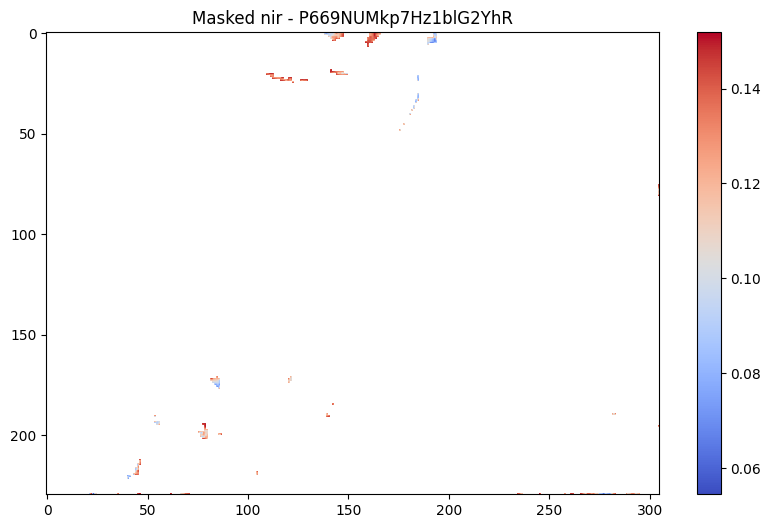

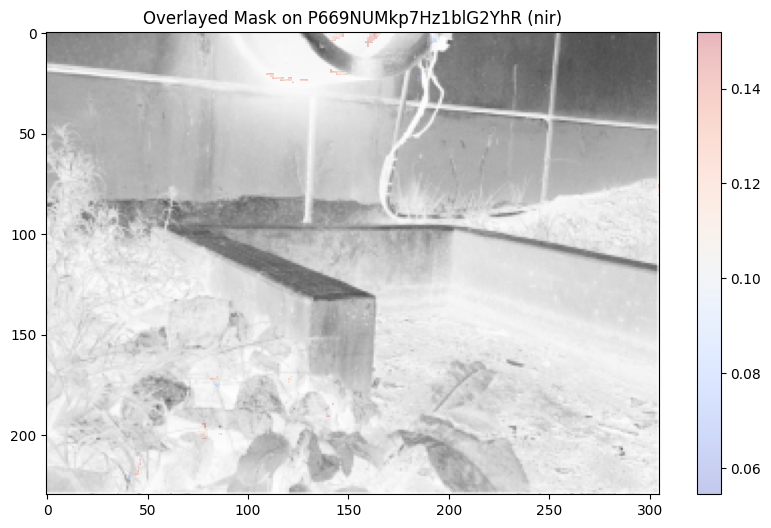

Processing band 'nir' for capture 'mCVxtf1SJXQpuZjpU9YT' with range [0, 0.152]


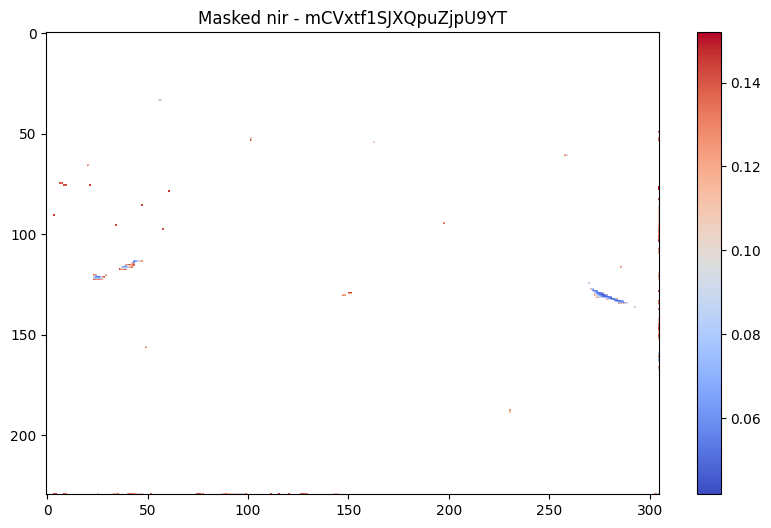

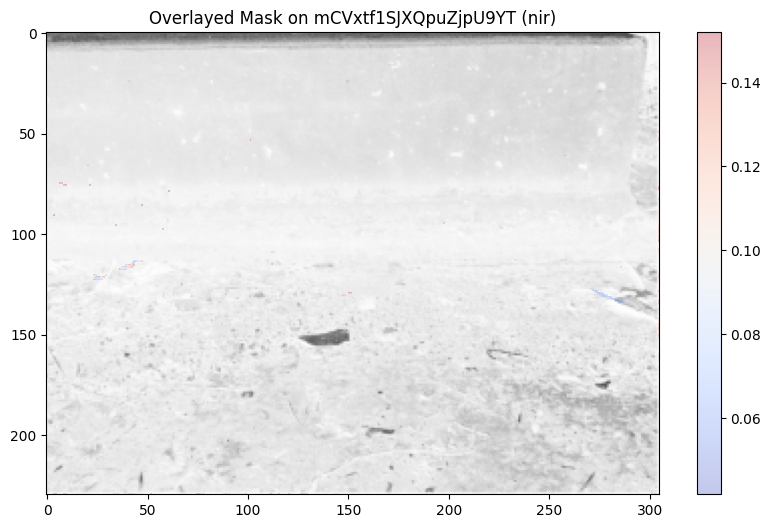

Processing band 'nir' for capture 'ctFl7FN29LOfyc2nbwco' with range [0, 0.152]


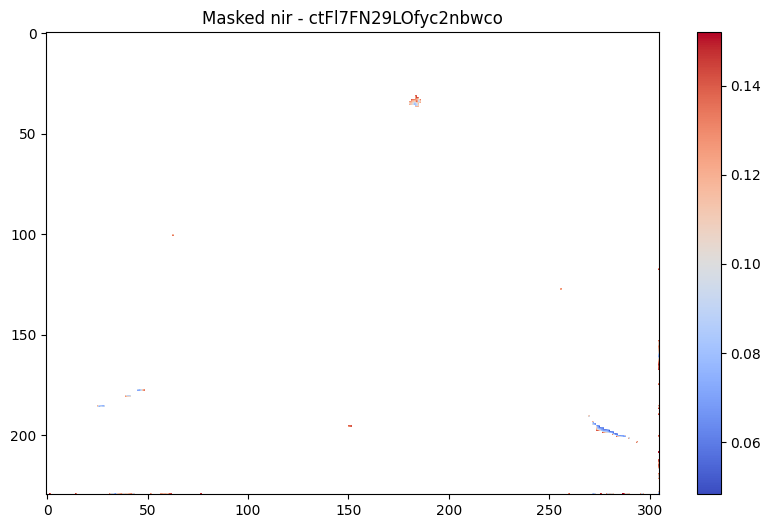

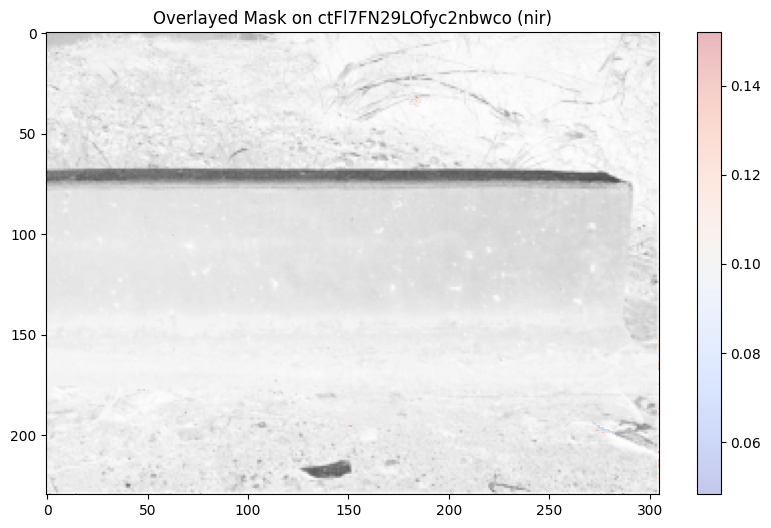

Processing band 'nir' for capture 'OsEX1fS3Dinqw78FMyLD' with range [0, 0.152]


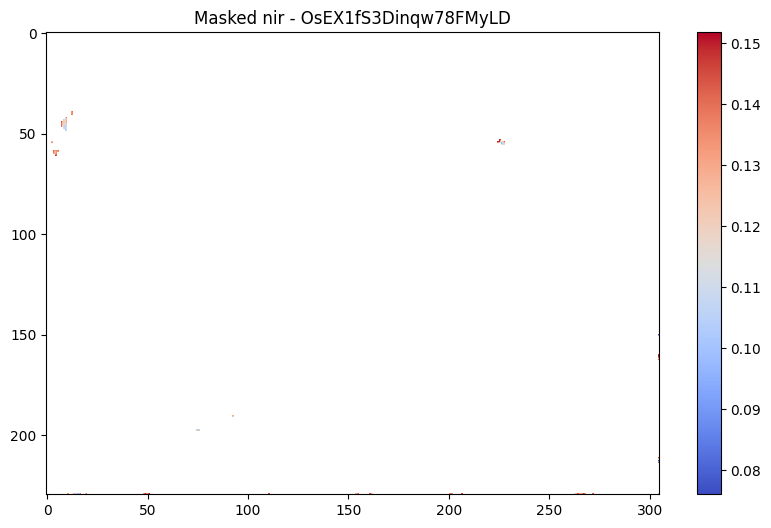

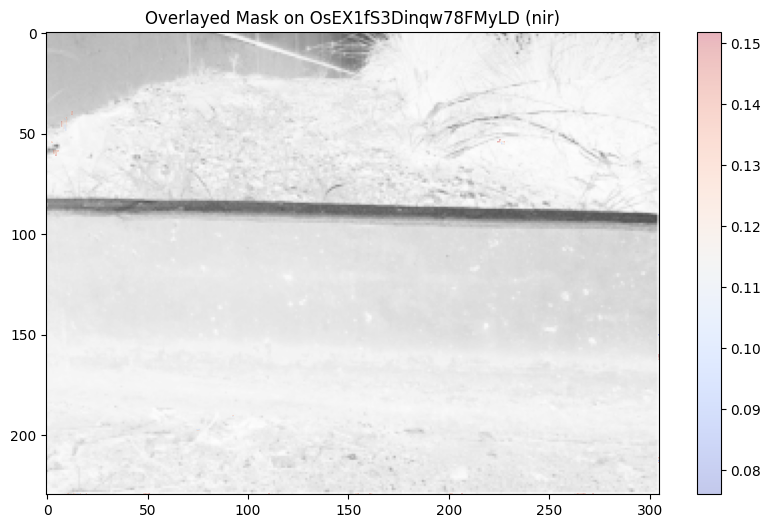

Processing band 'nir' for capture 'zPpQsjBur275bhRj51xz' with range [0, 0.152]


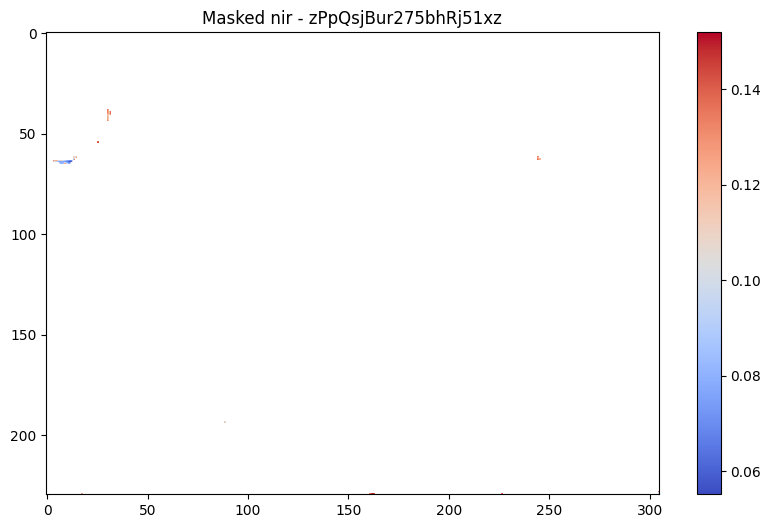

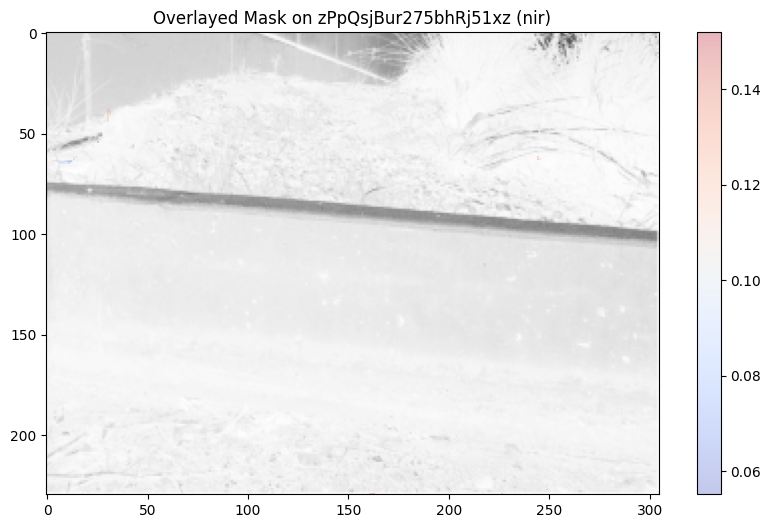

Masking completed for all captures and bands.


In [21]:
#MASK
if perform_mask.value:
    band_mask_ranges = {
        'nir': (0, 0.152)  # Mask for ndvi with range [0.3, 0.7]   # Mask for ndwi with range [0.2, 0.6]
    }
    
    #band_mask_ranges = {
      #  'ndvi': (0.3, 0.7),  # Mask for ndvi with range [0.3, 0.7]
      #  'ndwi': (0.2, 0.6)   # Mask for ndwi with range [0.2, 0.6]
  #  }

    image_shape=(im_height,im_width)

    masker(imagePath,fullCsvPath, band_mask_ranges,image_shape, plot_outputs=mask_plot_outputs.value, save_plots=mask_save_outputs.value, plot_overlay=mask_plot_overlay.value, save_overlay=mask_save_overlay.value)







In [22]:

########################Saving METADATA for all captures in stacks. generates log.csv###############################################
header = "SourceFile,\
GPSDateStamp,GPSTimeStamp,\
GPSLatitude,GPSLongitude,GPSAltitude\n"

lines = [header]
for capture in imgset.captures:
    #get lat,lon,alt,time
    outputFilename = capture.uuid+'.tif'
    fullOutputPath = os.path.join(outputPath, outputFilename)
    lat,lon,alt = capture.location()


    linestr = '"{}",'.format(fullOutputPath)
    linestr += capture.utc_time().strftime("%Y:%m:%d,%H:%M:%S,")
    linestr += '{},{},{}'.format(lat,lon,alt)

    linestr += '\n' # when writing in text mode, he write command will convert to os.linesep
    lines.append(linestr)

fullCsvPath = os.path.join(outputPath,'log.csv')
with open(fullCsvPath, 'w') as csvfile: #create CSV
    csvfile.writelines(lines)
    
############################rewriting metadata to stacks with exiftool#############################    
if os.environ.get('exiftoolpath') is not None:
    exiftool_cmd = os.path.normpath(os.environ.get('exiftoolpath'))
else:
    exiftool_cmd = 'exiftool'
        
cmd = '{} -csv="{}" -overwrite_original "{}"'.format(exiftool_cmd, fullCsvPath, outputPath)
print(cmd)
subprocess.check_call(cmd, shell=True)

if perform_mapping.value:
    plot_metadata_csv(fullCsvPath,outputPath,save_map=save_mapping.value)


exiftool -csv="/home/ogop/Documents/imageprocessing-master/data/impleme_day2/3i/../stacks/log.csv" -overwrite_original "/home/ogop/Documents/imageprocessing-master/data/impleme_day2/3i/../stacks"


    1 directories scanned
   10 image files updated


In [3]:
#ML stuff

perform_mask=widgets.Dropdown(
    options=[('No', 0), ('Yes', 1)],
    value=0,
    description='Perform ML',
)

perform_prob=widgets.Dropdown(
    options=[('No', 0), ('Yes', 1)],
    value=0,
    description='Perform Probability',
)

mask_plot_outputs=widgets.Dropdown(
    options=[('No', 0), ('Yes', 1)],
    value=0,
    description='Plot ML Output',
)
mask_save_outputs=widgets.Dropdown(
    options=[('No', 0), ('Yes', 1)],
    value=0,
    description='Save ML Output',
)

prob_plot_outputs=widgets.Dropdown(
    options=[('No', 0), ('Yes', 1)],
    value=0,
    description='Plot Prob Output',
)
prob_save_outputs=widgets.Dropdown(
    options=[('No', 0), ('Yes', 1)],
    value=0,
    description='Save Prob Output',
)


mm1=widgets.HBox([mask_plot_outputs, mask_save_outputs])
mm111=widgets.HBox([prob_plot_outputs, prob_save_outputs])

mm3=widgets.VBox([perform_mask,mm1])



ppp=widgets.VBox([perform_prob,mm111])


accordion_matt = widgets.Accordion(children=[mm3,ppp])

accordion_matt.set_title(0, 'ML Options')
accordion_matt.set_title(1, 'Custom_Proba Options')

accordion_matt

Accordion(children=(VBox(children=(Dropdown(description='Perform ML', options=(('No', 0), ('Yes', 1)), value=0…

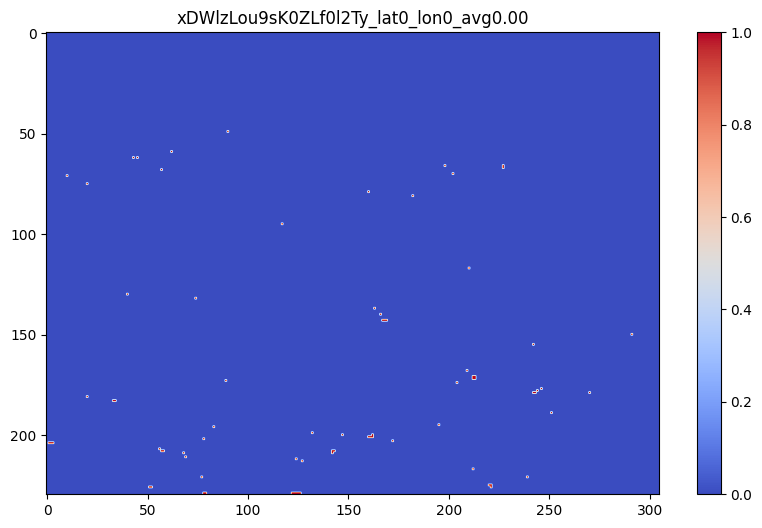

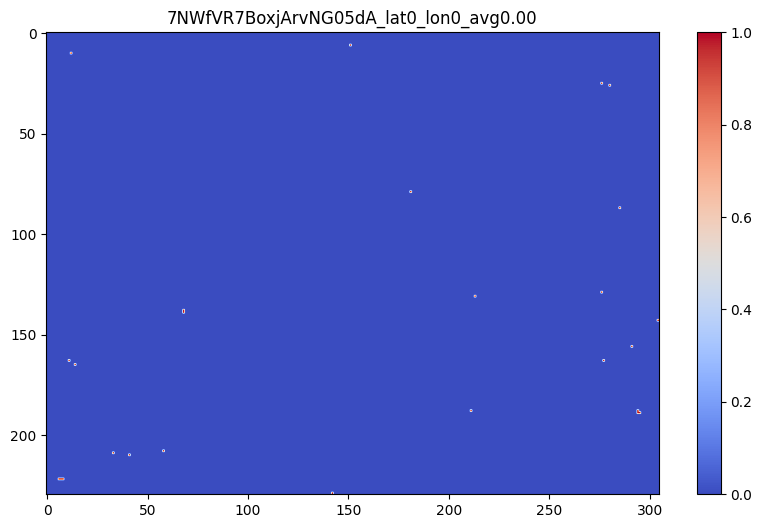

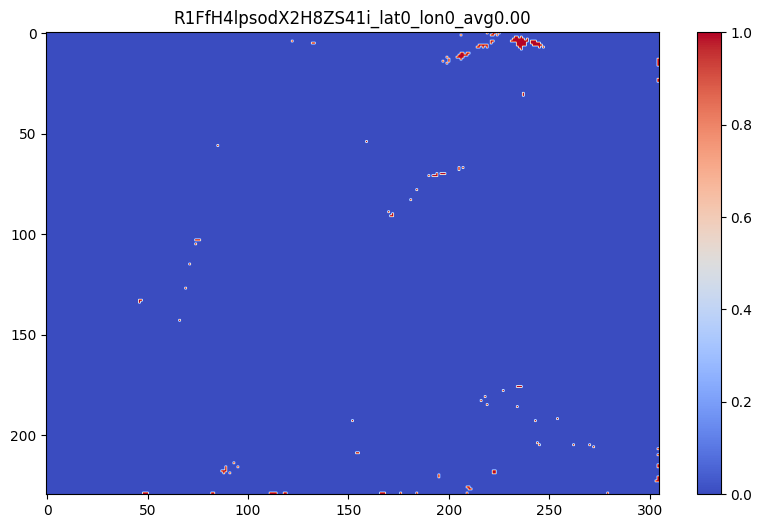

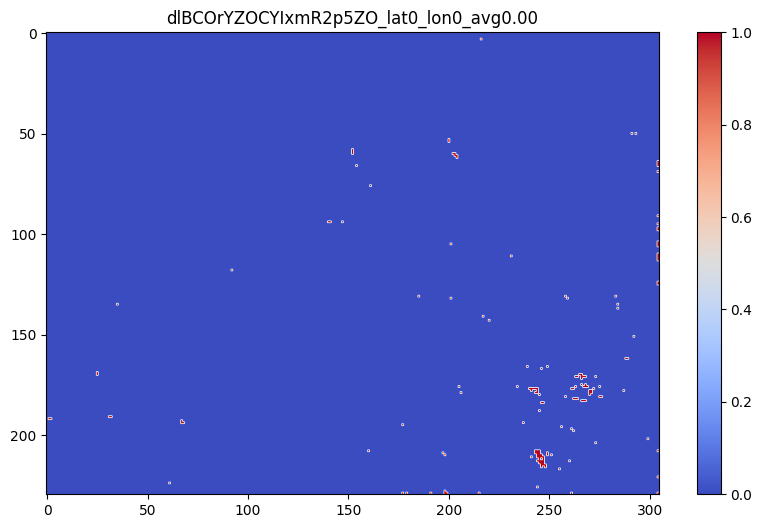

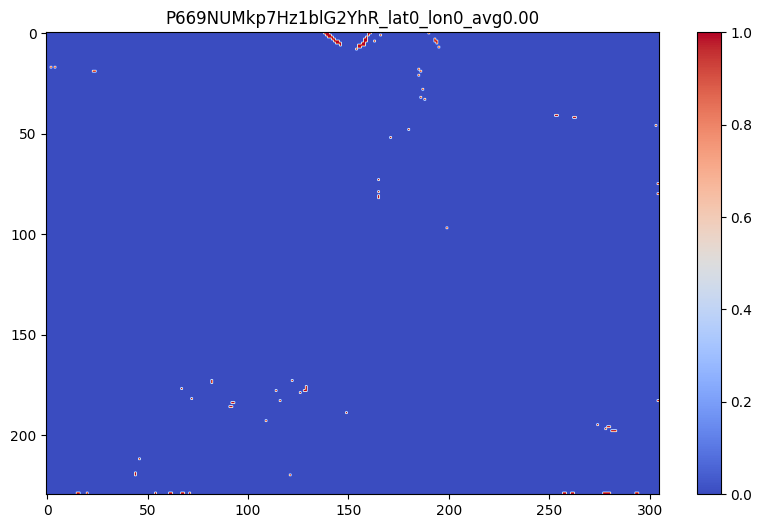

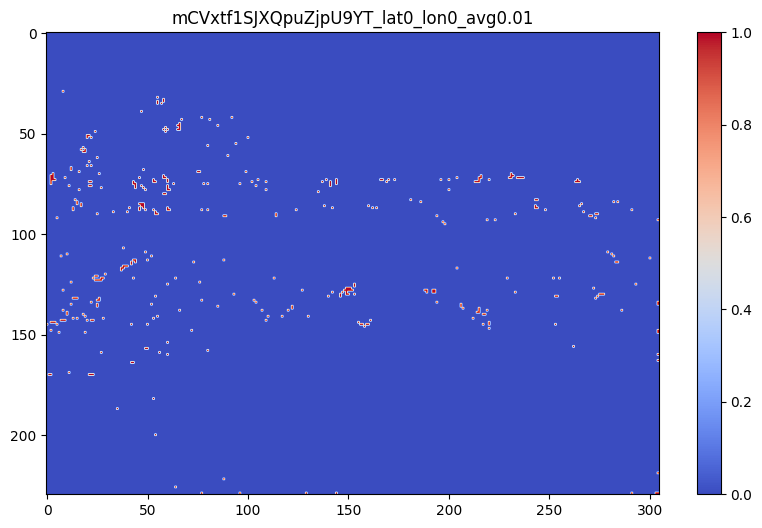

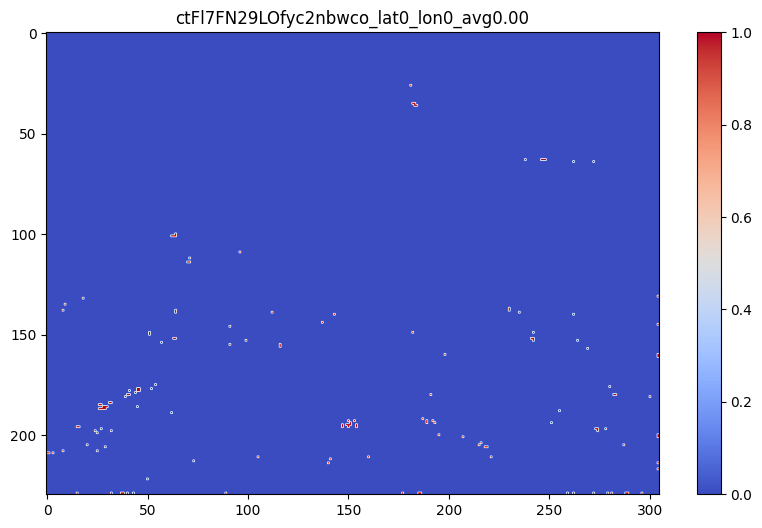

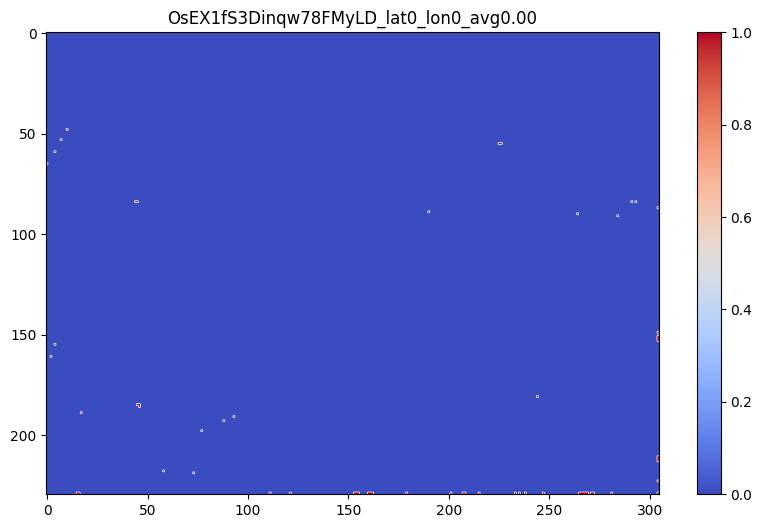

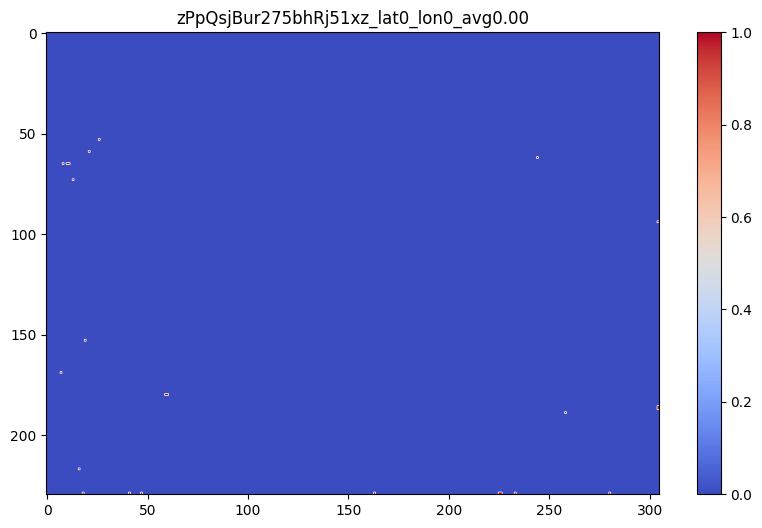

Predictions completed for all captures. Log saved as /home/ogop/Documents/imageprocessing-master/data/impleme_day2/3i/../stacks/ML_log.csv.


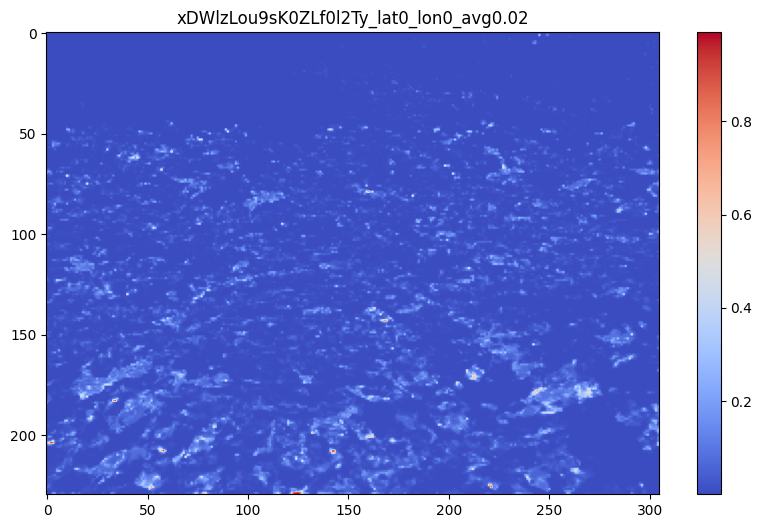

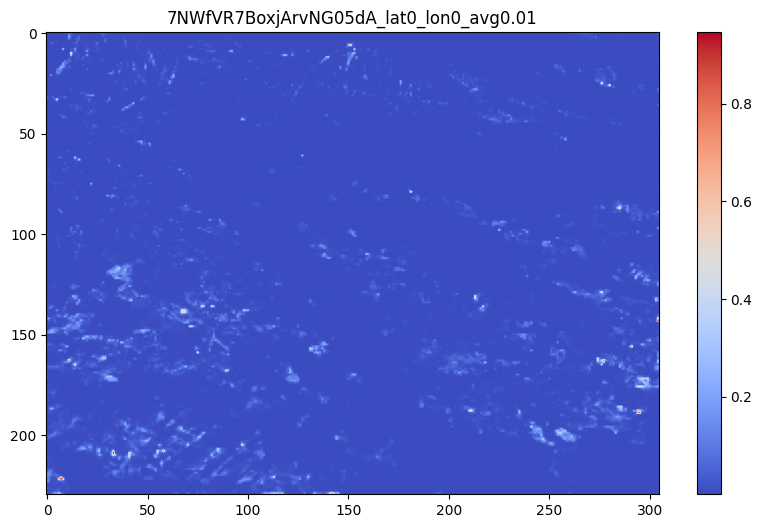

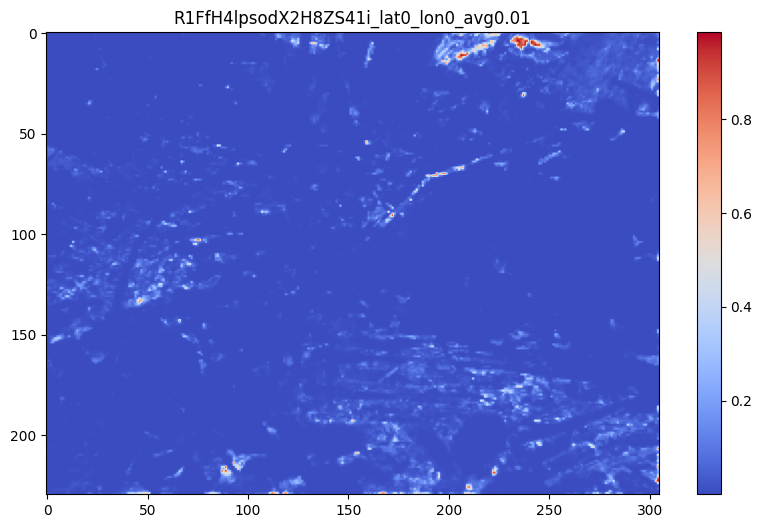

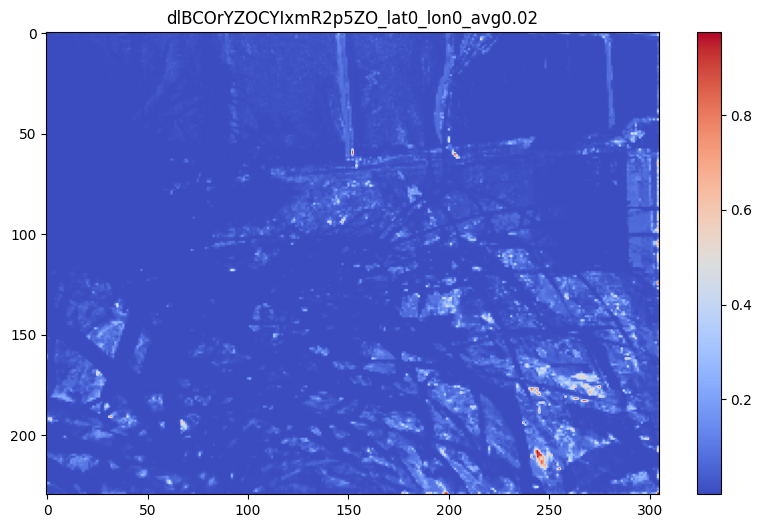

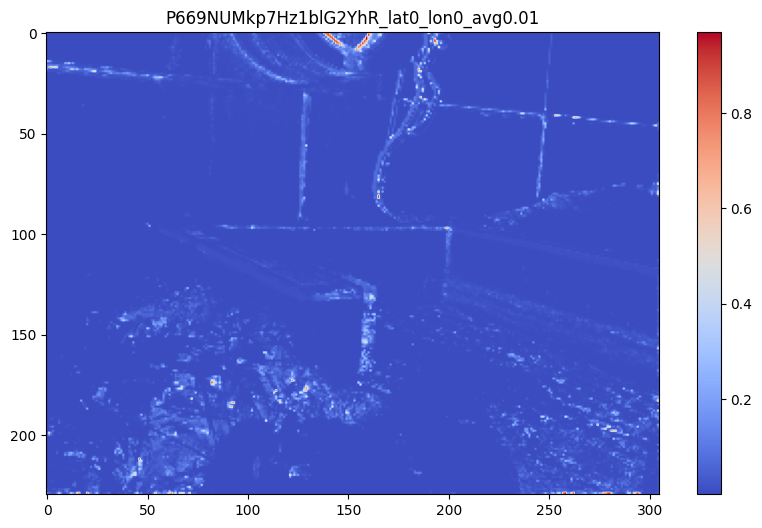

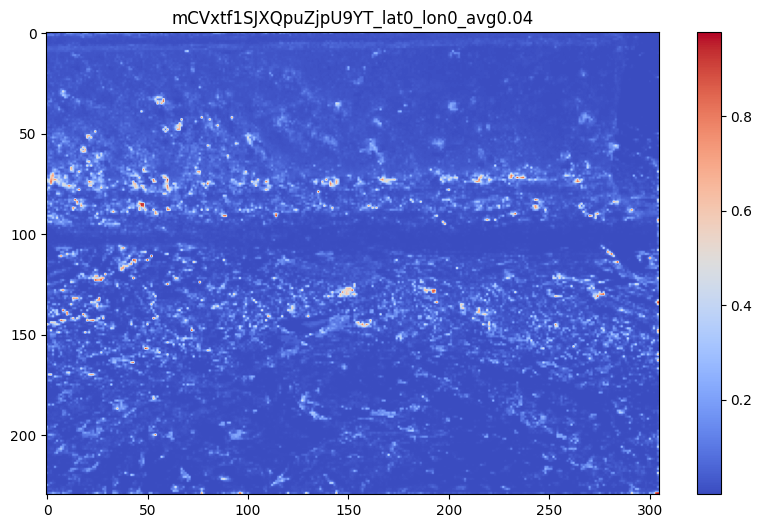

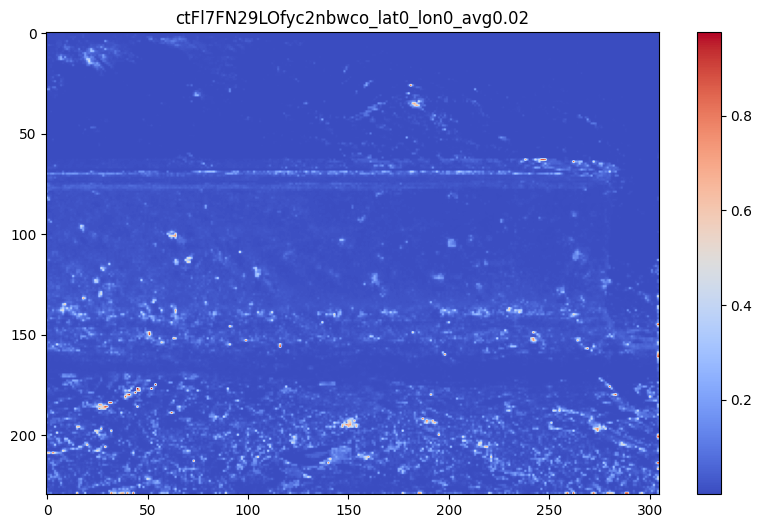

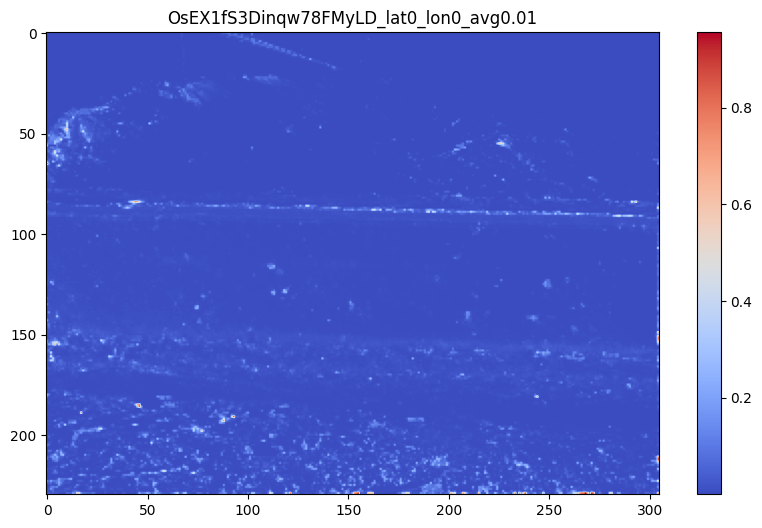

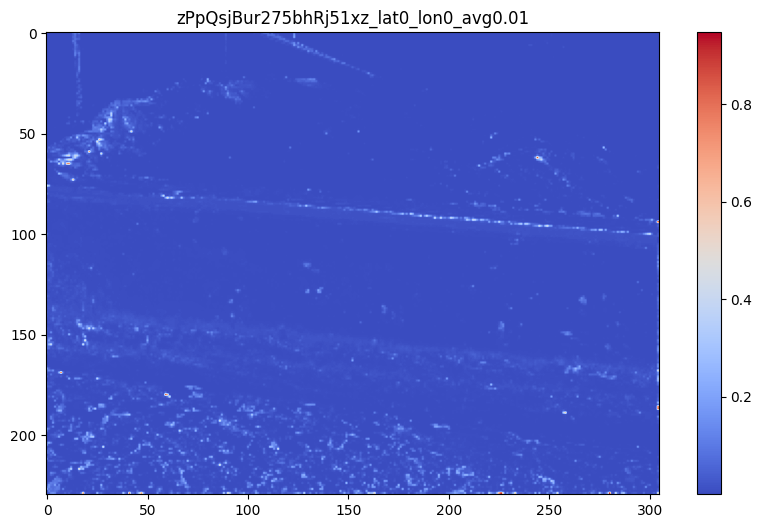

Predictions completed for all captures. Log saved as /home/ogop/Documents/imageprocessing-master/data/impleme_day2/3i/../stacks/ML_prob_log.csv.


In [5]:
#Run to perform RF or MLP
if perform_mask.value:
    rfmasker(imagePath, fullCsvPath, 'mlpday1.pickle', plot_outputs=mask_plot_outputs.value, save_plots=mask_save_outputs.value)

if perform_prob.value:
    probrfmasker(imagePath, fullCsvPath, 'mlpday1.pickle', plot_outputs=prob_plot_outputs.value, save_plots=prob_save_outputs.value)




2024-11-26 12:07:46.681221: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-26 12:07:46.695995: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-26 12:07:46.700077: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-26 12:07:46.715813: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-26 12:07:47.748290: W tensorflow/compiler/tf2

19730/19730 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step


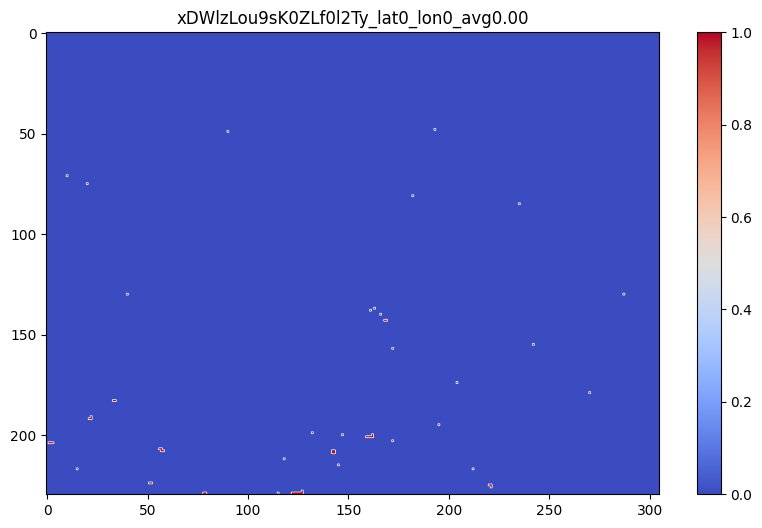

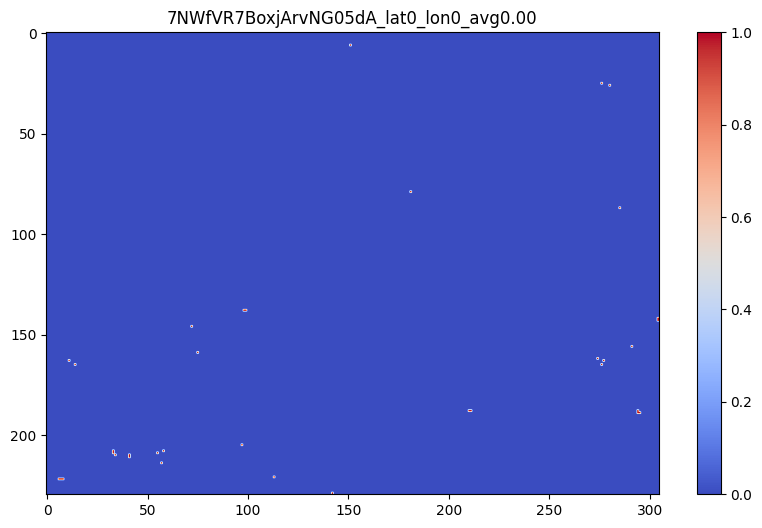

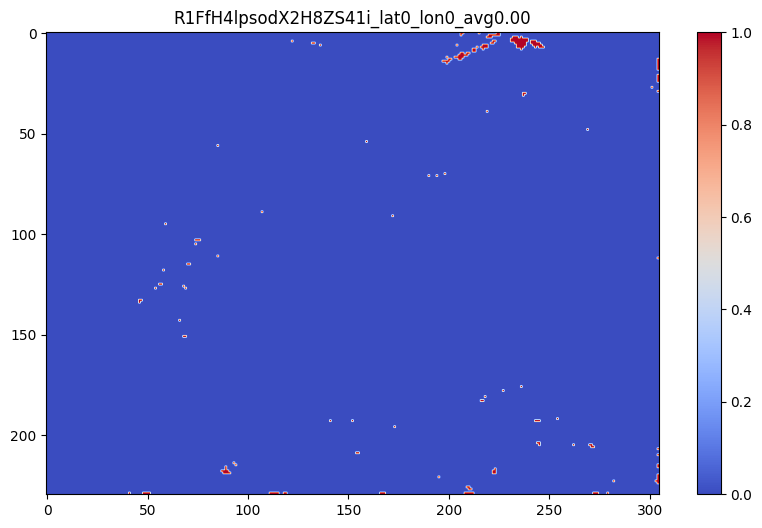

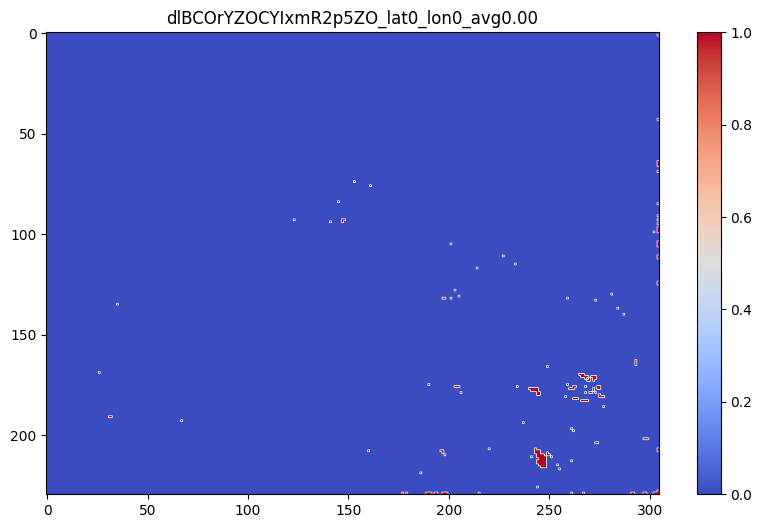

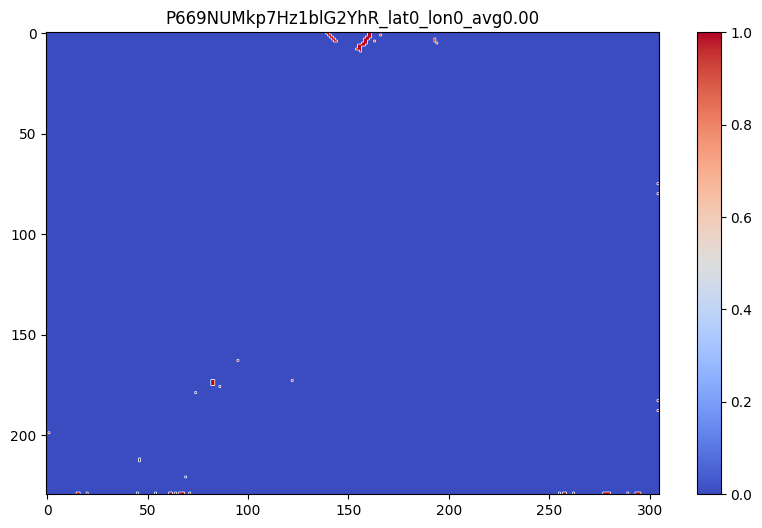

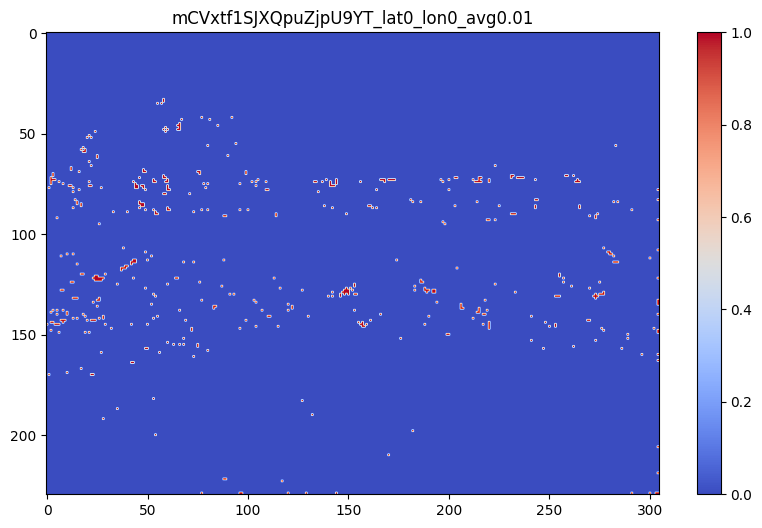

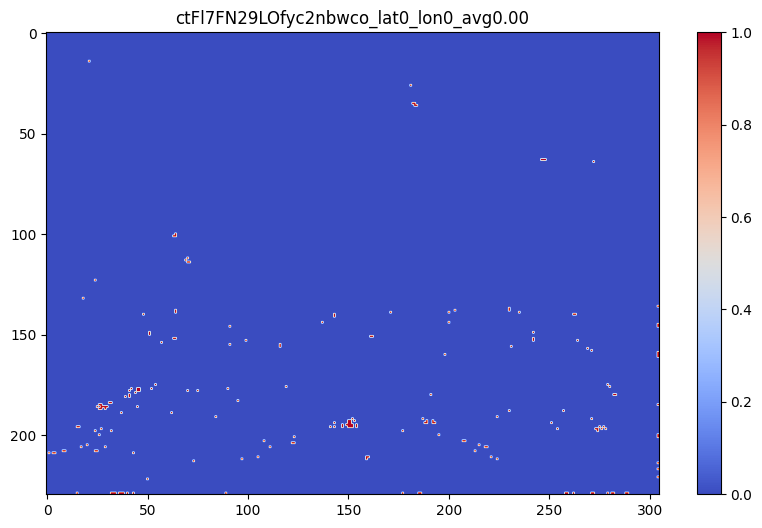

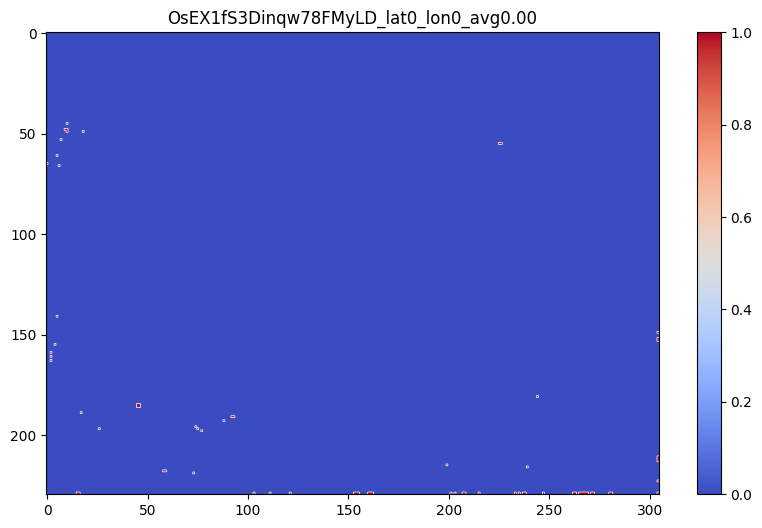

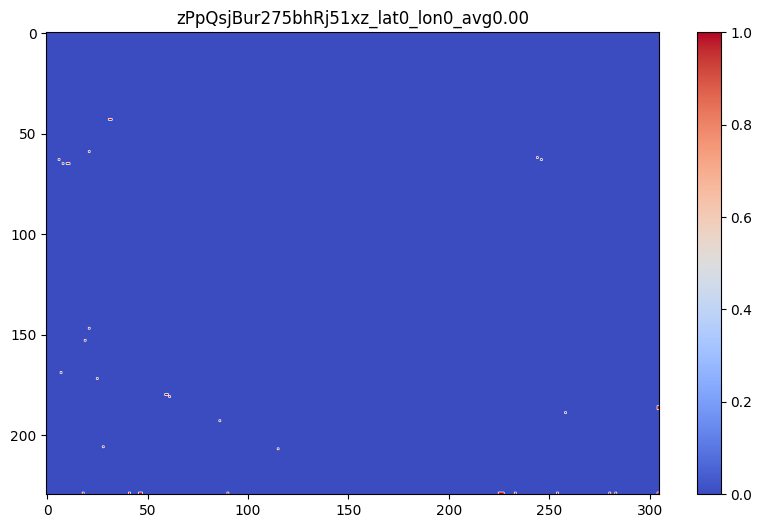

Predictions completed for all captures. Log saved as /home/ogop/Documents/imageprocessing-master/data/impleme_day2/3i/../stacks/ML_log.csv.
19730/19730 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step


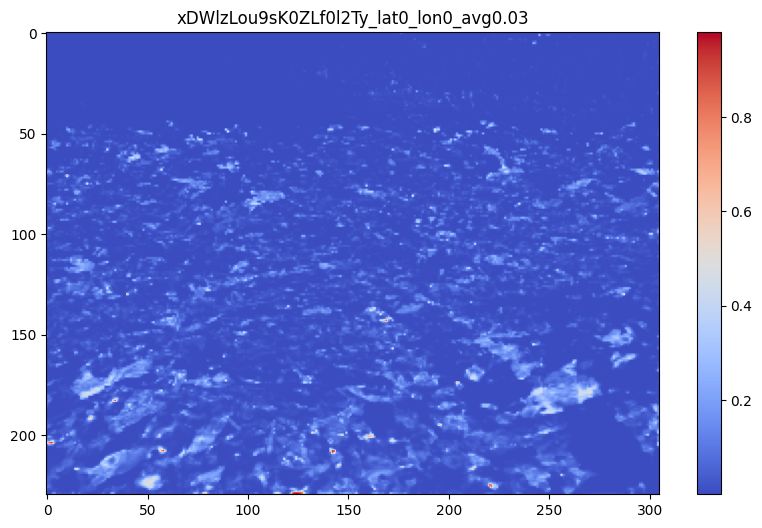

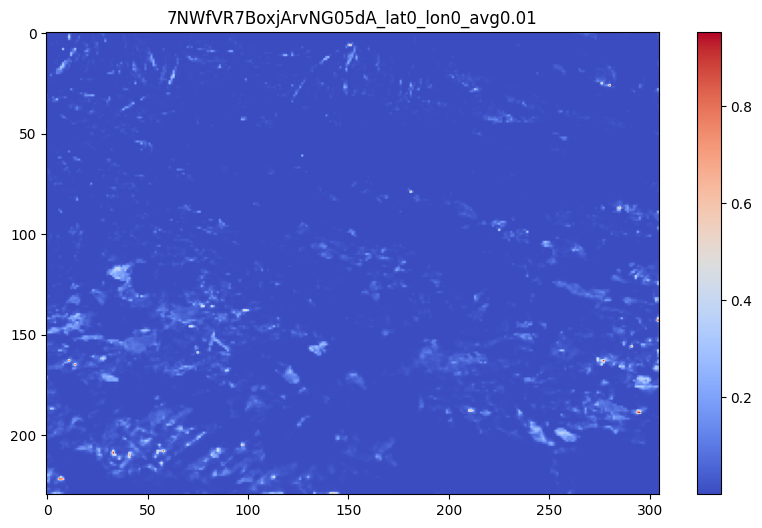

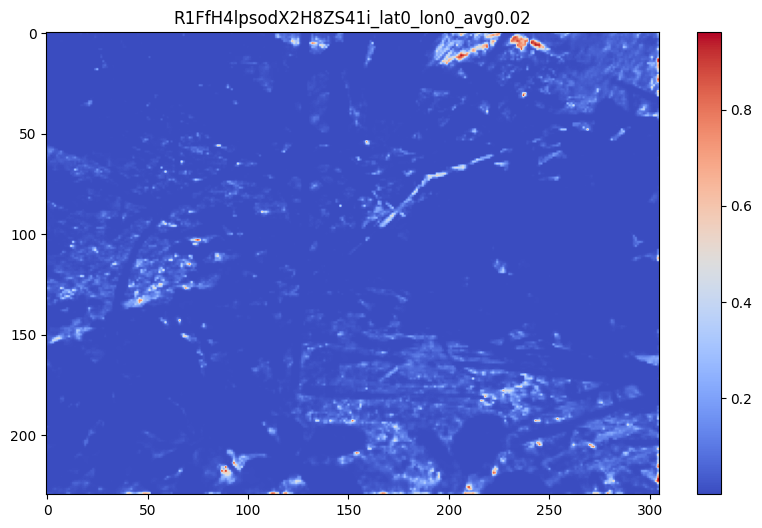

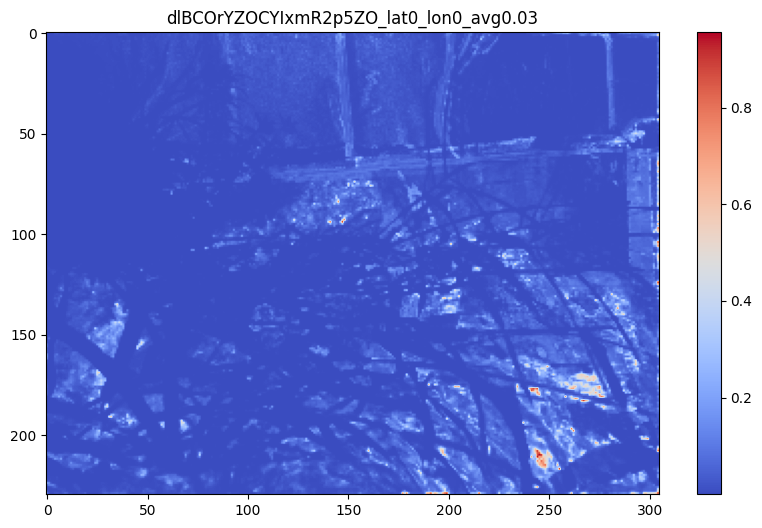

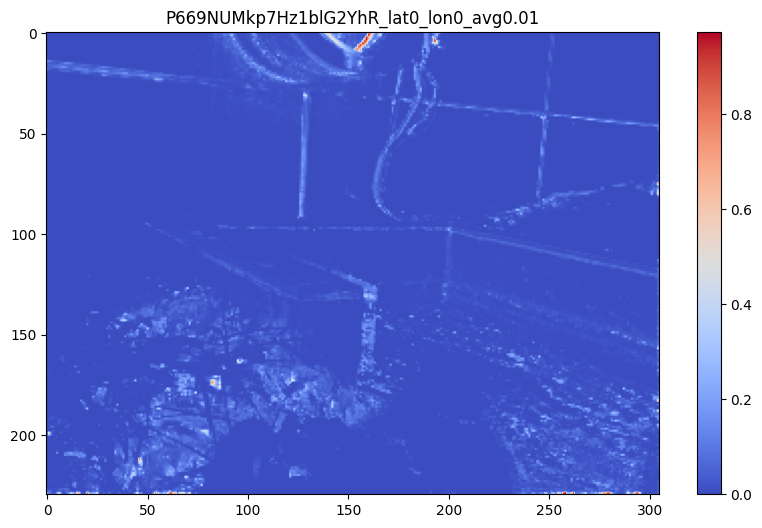

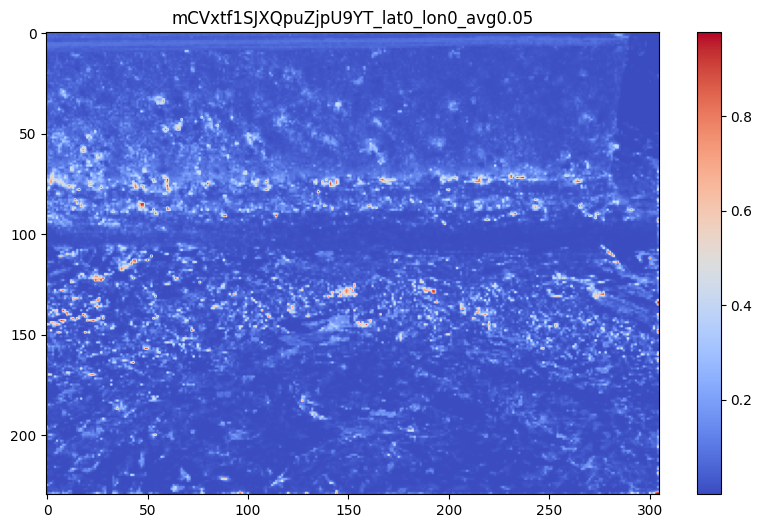

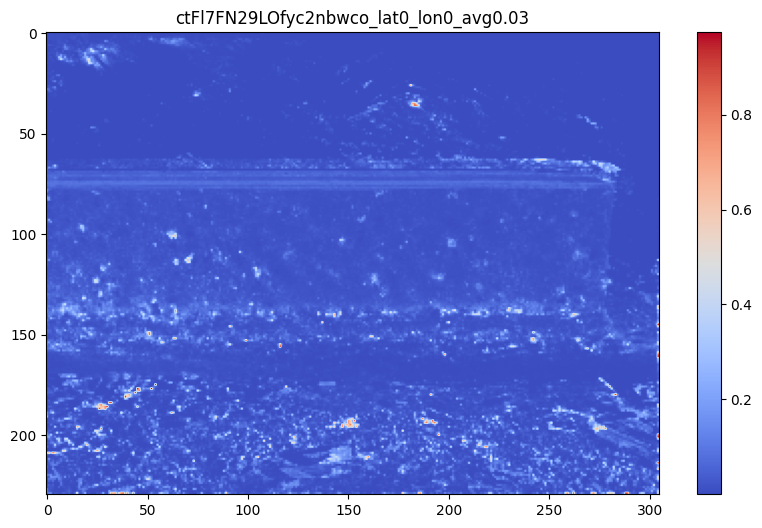

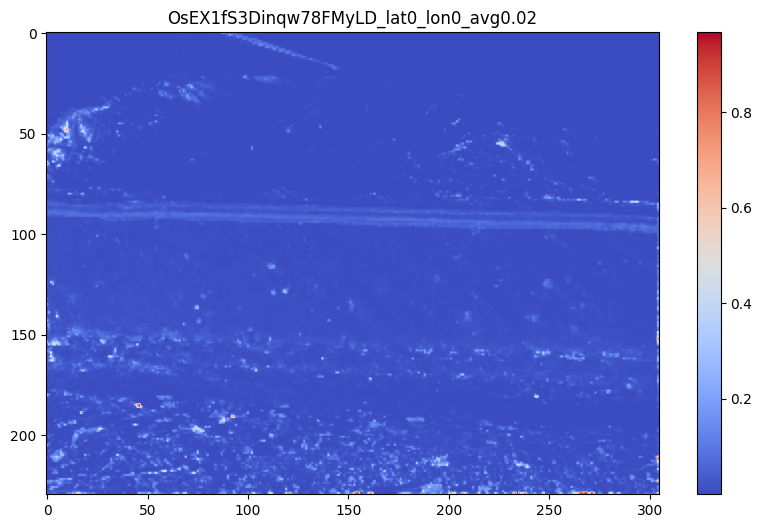

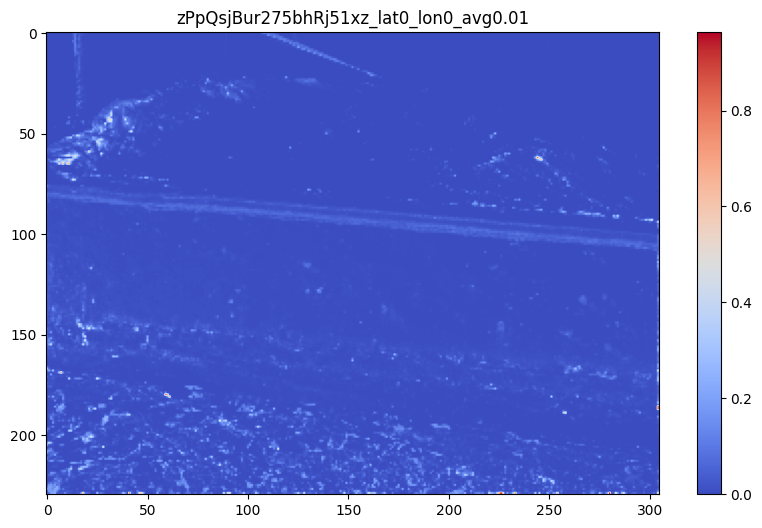

Predictions completed for all captures. Log saved as /home/ogop/Documents/imageprocessing-master/data/impleme_day2/3i/../stacks/ML_prob_log.csv.


In [6]:
#run to perform DNN
if perform_mask.value:
    dnnmasker(imagePath, fullCsvPath, 'DNNday1.pickle', plot_outputs=mask_plot_outputs.value, save_plots=mask_save_outputs.value)

if perform_prob.value:
    probdnnmasker(imagePath, fullCsvPath, 'DNNday1.pickle', plot_outputs=prob_plot_outputs.value, save_plots=prob_save_outputs.value)
